In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx 
import scipy as sp
import sympy as syp 
import random as rand
from sympy.plotting import plot3d
syp.interactive.printing.init_printing(use_latex= True)

In [6]:
#1
# constructing the symbols
x11 = syp.Symbol("x_11")
x22 = syp.Symbol("x_22")
x12 = syp.Symbol("x_12")
l1 = syp.Symbol("\lambda_1")
l2 = syp.Symbol("\lambda_2")
theta = syp.Symbol("\\theta")

In [7]:
# constructing the matracies
O = syp.Matrix([[syp.cos(theta), -syp.sin(theta)], [syp.sin(theta), syp.cos(theta)]])
L = syp.Matrix([[l1, 0], [0, l2]])
X = (O @ L) @ syp.transpose(O)
x11 = X[0, 0]
x22 = X[1, 1]
x12 = X[0, 1]

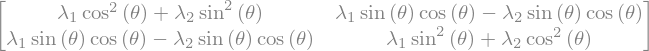

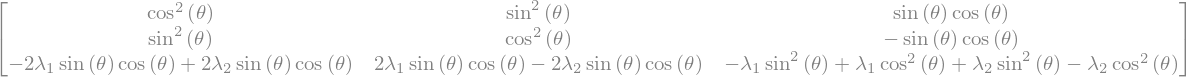

\left[\begin{matrix}\cos^{2}{\left(\theta \right)} & \sin^{2}{\left(\theta \right)} & \sin{\left(\theta \right)} \cos{\left(\theta \right)}\\\sin^{2}{\left(\theta \right)} & \cos^{2}{\left(\theta \right)} & - \sin{\left(\theta \right)} \cos{\left(\theta \right)}\\- 2 \lambda_{1} \sin{\left(\theta \right)} \cos{\left(\theta \right)} + 2 \lambda_{2} \sin{\left(\theta \right)} \cos{\left(\theta \right)} & 2 \lambda_{1} \sin{\left(\theta \right)} \cos{\left(\theta \right)} - 2 \lambda_{2} \sin{\left(\theta \right)} \cos{\left(\theta \right)} & - \lambda_{1} \sin^{2}{\left(\theta \right)} + \lambda_{1} \cos^{2}{\left(\theta \right)} + \lambda_{2} \sin^{2}{\left(\theta \right)} - \lambda_{2} \cos^{2}{\left(\theta \right)}\end{matrix}\right]
\lambda_{1} \sin^{6}{\left(\theta \right)} + 3 \lambda_{1} \sin^{4}{\left(\theta \right)} \cos^{2}{\left(\theta \right)} + 3 \lambda_{1} \sin^{2}{\left(\theta \right)} \cos^{4}{\left(\theta \right)} + \lambda_{1} \cos^{6}{\left(\theta \right)} - \lambda_{

In [11]:
# constructing the Jacobian and finding the determinant
J = syp.Matrix([[x11.diff(l1), x22.diff(l1), x12.diff(l1)], [x11.diff(l2), x22.diff(l2), x12.diff(l2)], [x11.diff(theta), x22.diff(theta), x12.diff(theta)]])
display(X, J)
d = J.det()
det = syp.simplify(d)
display(det)
print(syp.latex(J))
print(syp.latex(d))
print(syp.latex(det))

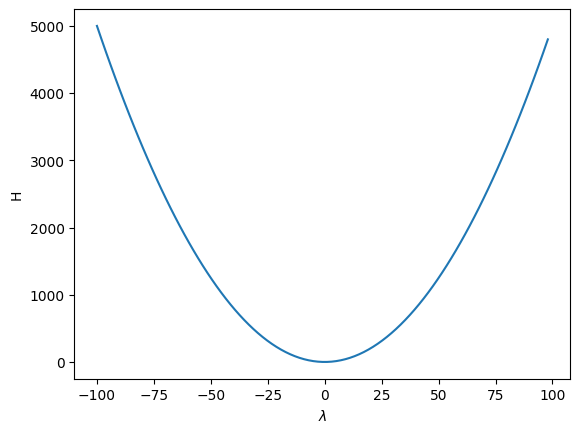

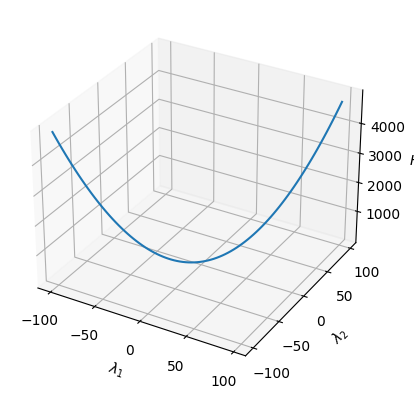

In [6]:
#2
H = []
lam = np.linspace(-100, 100, 100)
lam2 = np.linspace(-100, 100, 100)
for i in range(len(lam) - 1):
    H.append((1/2) * ((lam[i]**2) - np.log(np.abs(lam[i] - lam[i+1]))))
plt.plot(lam[:-1], H)
plt.xlabel("$\lambda$")
plt.ylabel("H")
plt.show()

ax = plt.axes(projection = "3d")
ax.set_xlabel("$\lambda_1$")
ax.set_ylabel("$\lambda_2$")
ax.set_zlabel("$H$")
ax.plot3D(lam[:-1], lam2[:-1], H,)
plt.show()

# sympy.plotting plot3d

<string>:1: RuntimeWarning: divide by zero encountered in log


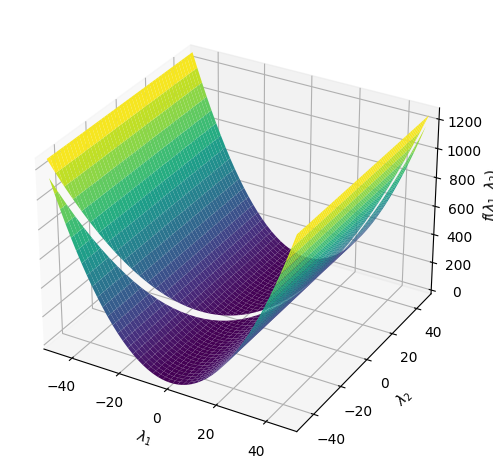

In [11]:
lam1 = syp.Symbol("\lambda_1")
lam2 = syp.Symbol("\lambda_2")
def H(lam1, lam2):
    return (1/2) * ((lam1 ** 2) - syp.log(syp.Abs(lam1 - lam2)))
plot3d(H(lam1, lam2), (lam1, -50, 50), (lam2, -50, 50))

In [3]:
def regression(x, y, n):
    def Vandermond(x, y, n):
        V = np.empty([len(x), n + 1])
        for i in range(n + 1):
            V[:, i] = x ** i
        return V

    def LeastSquare(V, y):
        Vt = np.transpose(V)
        A = Vt @ V
        Y = Vt @ y
        b = np.linalg.solve(A, Y)
        return b

    def fitpolynomial(x, b, n):
        Ps = np.zeros(len(x))
        for j in range(len(x)):
            p = 0
            for i in range(n + 1):
                p += b[i] * x[j] ** i
            Ps[j] = p
        return Ps

    V = Vandermond(x, y, n)
    b = LeastSquare(V, y)
    Ps = fitpolynomial(x, b, n)
    for i in range(len(x) - 1):
        xs = np.linspace(x[i], x[i+1], 50)
        p = fitpolynomial(xs, b, n)
        plt.plot(xs,p, color = 'k')

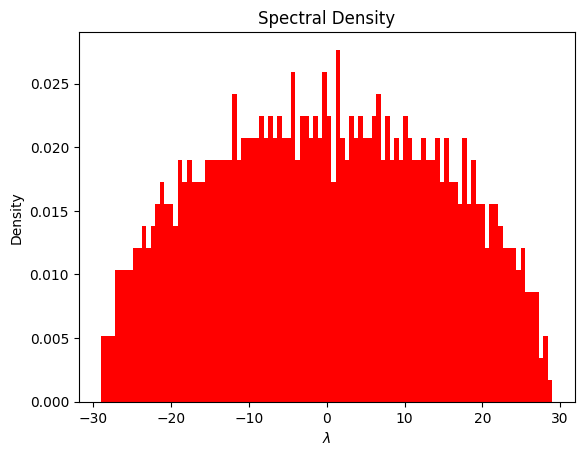

NameError: name 'regression' is not defined

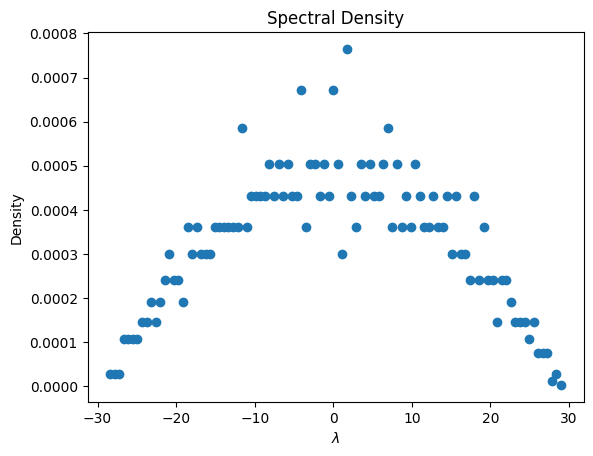

In [20]:
N = 1000
p = 0.3
G = nx.erdos_renyi_graph(N, p)
# pos = nx.circular_layout(G)
# plt.figure(figsize=(10,10))
# nx.draw(G, with_labels = True, pos = pos)
# plt.show()

r = np.sqrt(N*p*(1-p))
A = nx.to_numpy_array(G)
lam = np.linalg.eigvals(A)
n, l = np.histogram(lam, bins = 100, range = (-2 * r, 2 * r), density = True)
x = (1/2)*(l[1:] + l[:-1])
y = n**2

# plt.figure(figsize=(10,10))
plt.hist(lam, bins=100, range= (-2 * r, 2 * r), color = 'r', density = True)
plt.title("Spectral Density")
plt.xlabel("$\lambda$")
plt.ylabel("Density")
plt.show()
plt.scatter(l[1:], n**2)
plt.title("Spectral Density")
plt.xlabel("$\lambda$")
plt.ylabel("Density")
regression(x, y, 2)
plt.show()

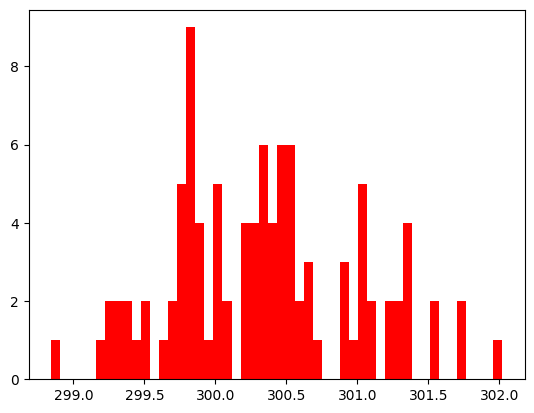

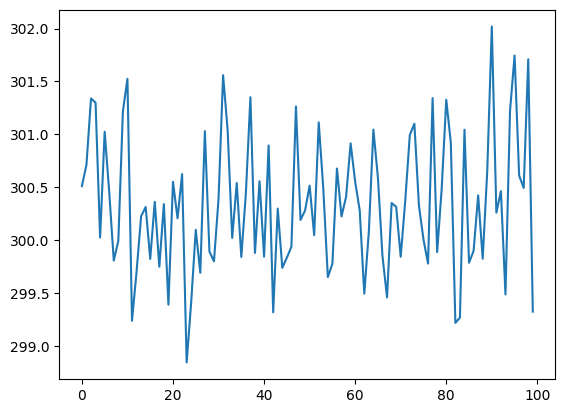

In [5]:
N = 1000
p = 0.3
maxl = np.zeros(100)
for i in range(100):
    G = nx.erdos_renyi_graph(N, p)
    A = nx.to_numpy_array(G)
    lam = np.linalg.eigvals(A)
    maxl[i] = np.max(lam)
plt.hist(maxl, bins=50, color = 'r')
plt.show()
plt.plot(np.arange(100), maxl)
plt.show()

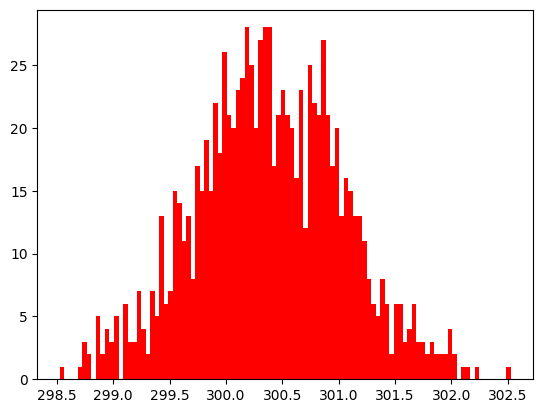

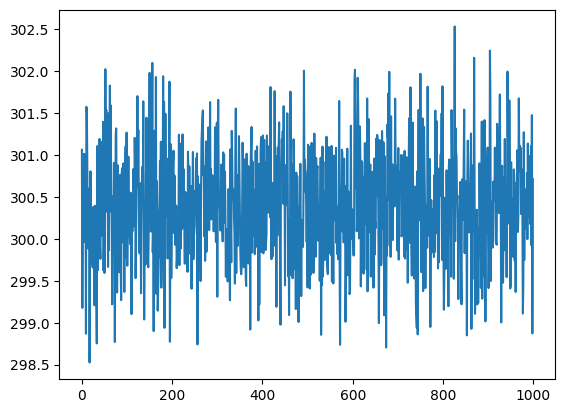

In [21]:
N = 1000
p = 0.3
maxl = np.zeros(1000)
for i in range(1000):
    G = nx.erdos_renyi_graph(N, p)
    A = nx.to_numpy_array(G)
    lam = np.linalg.eigvals(A)
    maxl[i] = np.max(lam)
plt.hist(maxl, bins=100, color = 'r')
plt.show()
plt.plot(np.arange(1000), maxl)
plt.show()